In [30]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("syedanwarafridi/vehicle-sales-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\uygun\.cache\kagglehub\datasets\syedanwarafridi\vehicle-sales-data\versions\1


In [32]:
import pandas as pd

# csv to dataframe
df = pd.read_csv("C:/Users/uygun/OneDrive/Masaüstü/ML Bootcamp Akbank/Dataset/car_prices.csv", encoding='Utf-8', sep=',', on_bad_lines='skip')
# Show first 5 rows
print(df.head())

   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors ameri

In [33]:
# controling the data have null values
df.isnull().values.any()

np.True_

In [34]:
# deleting the null values
df = df.dropna()

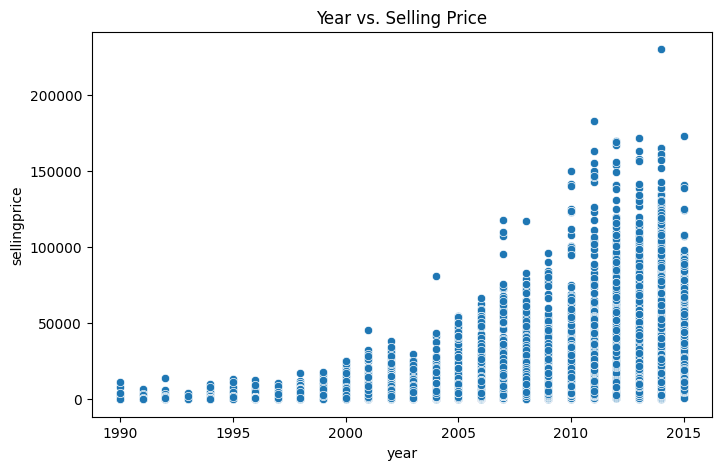

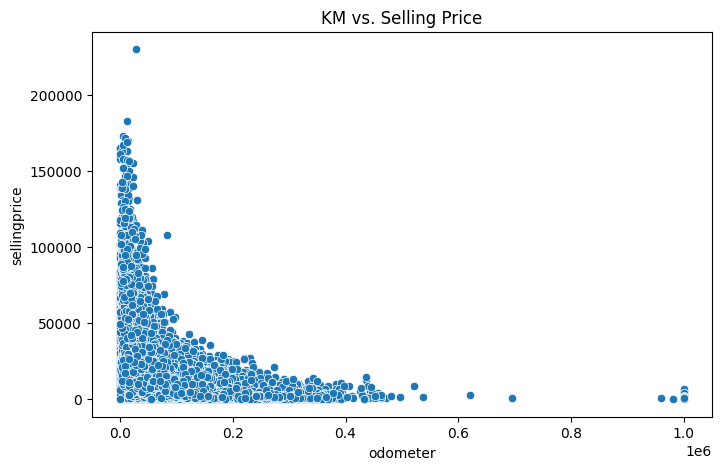

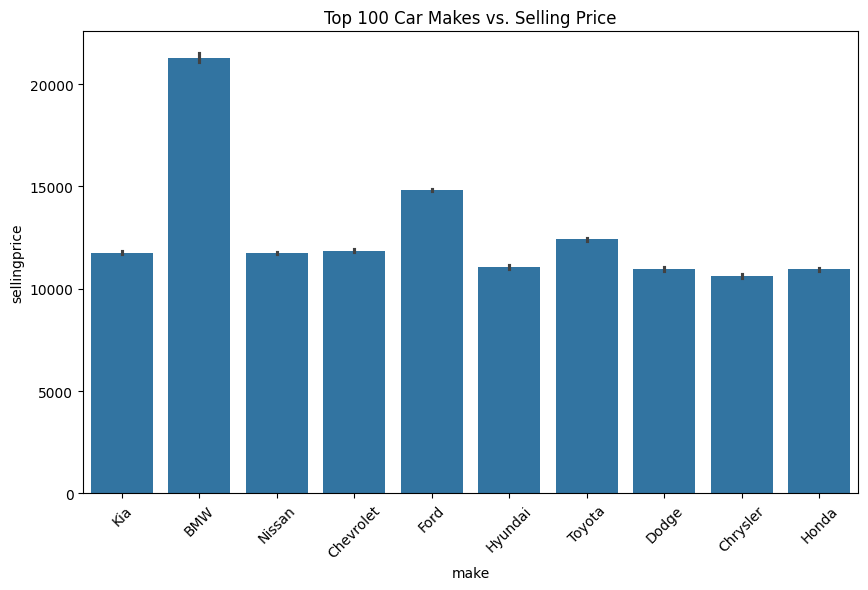

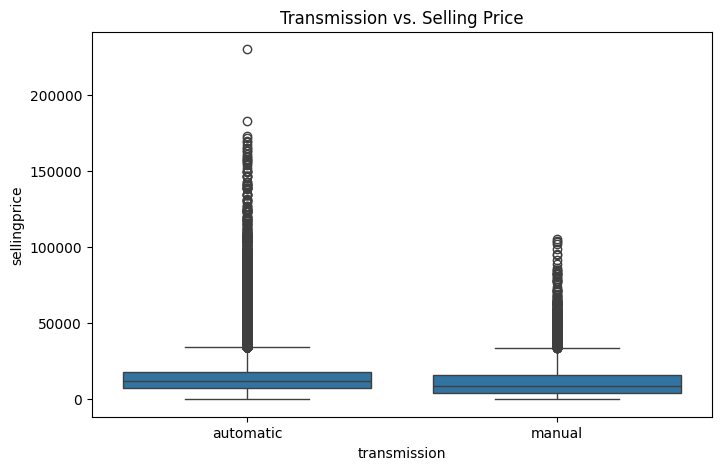

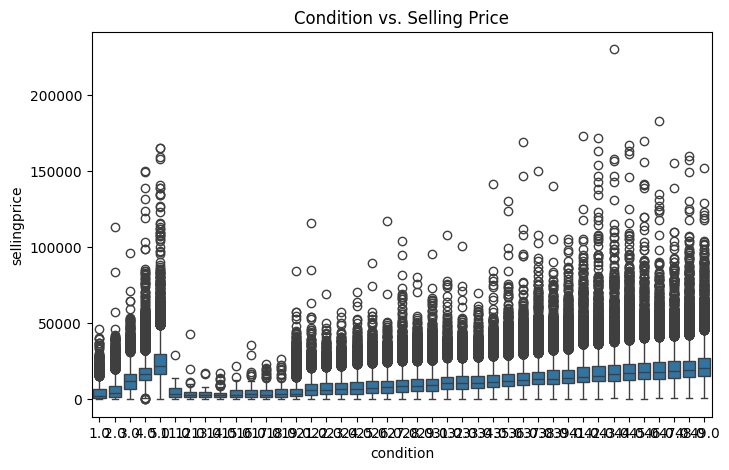

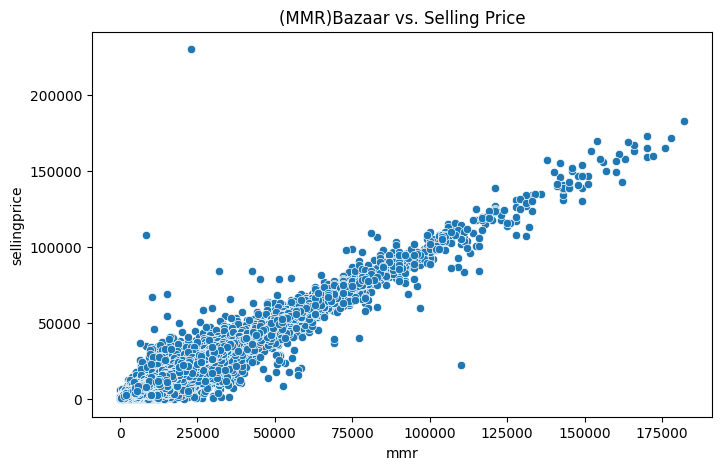

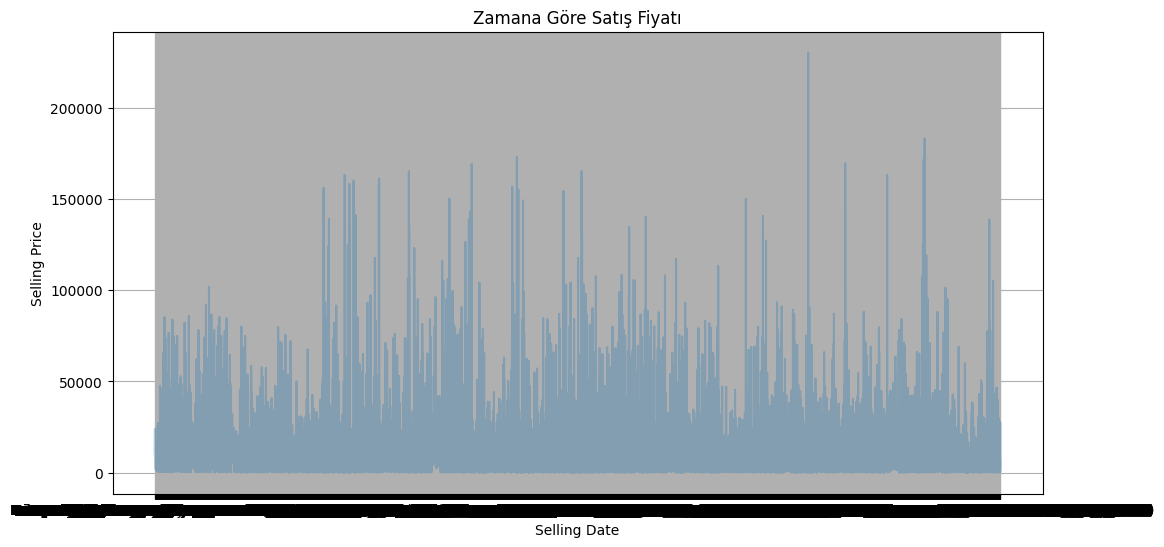

In [35]:
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# year vs. sellingprice 
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='year', y='sellingprice')
plt.title("Year vs. Selling Price")
plt.show()

# km vs. sellingprice
plt.figure(figsize=(8, 5))
sns.scatterplot(x='odometer', y='sellingprice', data=df)
plt.title("KM vs. Selling Price")
plt.show()

# make vs. sellingprice (Top 10)
plt.figure(figsize=(10, 6))
top_makes = df['make'].value_counts().head(10).index
sns.barplot(data=df[df['make'].isin(top_makes)], x='make', y='sellingprice')
plt.title("Top 100 Car Makes vs. Selling Price")
plt.xticks(rotation=45)
plt.show()

# transmission vs. sellingprice
plt.figure(figsize=(8, 5))
sns.boxplot(x='transmission', y='sellingprice', data=df)
plt.title("Transmission vs. Selling Price")
plt.show()

# condition vs. sellingprice
plt.figure(figsize=(8, 5))
sns.boxplot(x='condition', y='sellingprice', data=df)
plt.title("Condition vs. Selling Price")
plt.show()

# mmr vs. sellingprice 
plt.figure(figsize=(8, 5))
sns.scatterplot(x='mmr', y='sellingprice', data=df)
plt.title("(MMR)Bazaar vs. Selling Price")
plt.show()

# How have prices changed over time?
df_sorted = df.sort_values('saledate')
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['saledate'], df_sorted['sellingprice'], alpha=0.3)
plt.title('Zamana Göre Satış Fiyatı')
plt.xlabel('Selling Date')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()


In [36]:
# normalizing the data
from sklearn.preprocessing import StandardScaler

# selecting numeric columns for normalization
numeric_cols = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

# coppying the numeric columns to a new DataFrame
df_numeric = df[numeric_cols].copy()

# StandardScaler application
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_cols)

print(df_scaled.head())


       year  condition  odometer       mmr  sellingprice
0  1.252966  -1.939826 -0.963866  0.698992      0.812386
1  1.252966  -1.939826 -1.103374  0.730464      0.812386
2  0.991333   1.070669 -1.258593  1.894936      1.696603
3  1.252966   0.769620 -1.009245  1.433343      1.462546
4  0.991333   0.920144 -1.233371  5.472277      5.545548


In [40]:
# continues normalization
#I received memory errors while doing one hot encoding. 
# To reduce this, I selected and used the most important factors in determining the price of the vehicle.
# I did not use categorical variables such as trim, color, and seller, which were not very important.

# selecting categorical columns for one-hot encoding
categorical_cols = ['make', 'model', 'body', 'transmission']

# One-hot encoding the categorical columns
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Combining the scaled numeric data and the encoded categorical data
df_final = pd.concat([df_scaled, df_encoded], axis=1)
print(df_final.tail())


        year  condition  odometer  mmr  sellingprice make_Aston Martin  \
558831   NaN        NaN       NaN  NaN           NaN             False   
558833   NaN        NaN       NaN  NaN           NaN             False   
558834   NaN        NaN       NaN  NaN           NaN             False   
558835   NaN        NaN       NaN  NaN           NaN             False   
558836   NaN        NaN       NaN  NaN           NaN             False   

       make_Audi make_BMW make_Bentley make_Buick  ... body_sedan  \
558831     False     True        False      False  ...      False   
558833     False    False        False      False  ...      False   
558834     False     True        False      False  ...      False   
558835     False    False        False      False  ...       True   
558836     False    False        False      False  ...      False   

       body_supercab body_supercrew body_suv body_transit van  \
558831         False          False    False            False   
558833    

In [ ]:
# sperating education and target variable

from sklearn.model_selection import train_test_split

y = df_final['sellingprice']
X = df_final.drop('sellingprice', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Libraries
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import numpy as np

In [ ]:
# cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Custom scorer to see errors as RMSE
rmse_scorer = make_scorer(mean_squared_error, squared=False)


In [ ]:
# Performance Measurement for Linear Regression
lr = LinearRegression()
lr_scores = cross_val_score(lr, X, y, cv=kf, scoring=rmse_scorer)

print("Linear Regression RMSE:", lr_scores)
print("Average RMSE:", np.mean(lr_scores))


In [ ]:
# Performance Measurement for Decision Tree Regressor
tree = DecisionTreeRegressor(max_depth=20, random_state=42)
tree_scores = cross_val_score(tree, X, y, cv=kf, scoring=rmse_scorer)

print("Decision Tree RMSE:", tree_scores)
print("Average RMSE:", np.mean(tree_scores))


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from scipy.stats import randint
import numpy as np

# Model
model = DecisionTreeRegressor(random_state=42)

# Parametre aralıkları (hızlı çalışacak şekilde optimize edilmiş)
param_dist = {
    'max_depth': [5, 10, 20],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'criterion': ['squared_error', 'absolute_error']
}

# RMSE skoru (negatif çünkü sklearn maximize etmeye çalışır)
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

# Randomized Search CV ayarı
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=30,
    scoring=rmse_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Eğitimi başlat
random_search.fit(X_train, y_train)

# En iyi modeli seç
best_model = random_search.best_estimator_

# Test verisinde tahmin yap
y_pred = best_model.predict(X_test)

# RMSE hesapla
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Test RMSE: {rmse:.4f}")
